In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParmas["figure.figsize"]=(10,6)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# from plotly.subplots import make_subplots

# %matplotlib inline
import warnings

warnings.filterwarnings("ignore")


Data Set

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

EDA

In [3]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [4]:
df.tail(5)

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248

In [5]:
df.sample(5)

Make             Model            Vehicle Class  \
2712          HONDA              CR-Z               TWO-SEATER   
4589      CHEVROLET     SILVERADO FFV  PICKUP TRUCK - STANDARD   
5306        PORSCHE         CAYENNE S           SUV - STANDARD   
1052     VOLKSWAGEN            PASSAT                 MID-SIZE   
772   MERCEDES-BENZ  S 550 4MATIC SWB                FULL-SIZE   

      Engine Size(L)  Cylinders Transmission Fuel Type  \
2712             1.5          4           M6         X   
4589             4.3          6           A6         X   
5306             3.6          6           A8         Z   
1052             3.6          6           A6         Z   
772              4.7          8          AS7         Z   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
2712                               7.9                              6.5   
4589                              13.4                             10.0   
5306                              13.9                              9.6   
1052                              12.4                              8.8   
772                               14.2                              9.4   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
2712                               7.3                           39   
4589                              11.8                           24   
5306                              12.0                           24   
1052                              10.8                           26   
772                               12.0                           24   

      CO2 Emissions(g/km)  
2712                  169  
4589                  278  
5306                  281  
1052                  248  
772                   276

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
#Null Values Check
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
#Shape
df.shape

(7385, 12)

In [9]:
#Columns name
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [10]:
#Editing Column names
renamed_columns = {
    'Make':'make',
    'Model':'model',
    'Vehicle Class':'vehicle_class',
    'Engine Size(L)':'engine_size',
    'Cylinders':'cylinders',
    'Transmission':'transmission',
    'Fuel Type':'fuel_type',
    'Fuel Consumption City (L/100 km)':'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)':'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)':'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)':'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)':'co2'
}

df.rename(renamed_columns, axis = 'columns', inplace = True)

In [11]:
df.head(2)

make model vehicle_class  engine_size  cylinders transmission fuel_type  \
0  ACURA   ILX       COMPACT          2.0          4          AS5         Z   
1  ACURA   ILX       COMPACT          2.4          4           M6         Z   

   fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  mpgfuel_cons_comb  co2  
0             9.9            6.7             8.5                 33  196  
1            11.2            7.7             9.6                 29  221

In [12]:
def get_unique_values(df):
    output_data = []
    for col in df.columns:
        # If the number of unique values in the column is less than or equal to 10
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])
    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])
    return output_df
get_unique_values(df)

Column Name  Number of Unique Values               Unique Values   \
0                make                       42                            -   
1               model                     2053                            -   
2       vehicle_class                       16                            -   
3         engine_size                       51                            -   
4           cylinders                        8  [4, 6, 12, 8, 10, 3, 5, 16]   
5        transmission                       27                            -   
6           fuel_type                        5              [Z, D, X, E, N]   
7      fuel_cons_city                      211                            -   
8       fuel_cons_hwy                      143                            -   
9      fuel_cons_comb                      181                            -   
10  mpgfuel_cons_comb                       54                            -   
11                co2                      331                            -   

   Data Type  
0     object  
1     object  
2     object  
3    float64  
4      int64  
5     object  
6     object  
7    float64  
8    float64  
9    float64  
10     int64  
11     int64

In [13]:
#Descriptive Statistics
df.describe()

engine_size    cylinders  fuel_cons_city  fuel_cons_hwy  \
count  7385.000000  7385.000000     7385.000000    7385.000000   
mean      3.160068     5.615030       12.556534       9.041706   
std       1.354170     1.828307        3.500274       2.224456   
min       0.900000     3.000000        4.200000       4.000000   
25%       2.000000     4.000000       10.100000       7.500000   
50%       3.000000     6.000000       12.100000       8.700000   
75%       3.700000     6.000000       14.600000      10.200000   
max       8.400000    16.000000       30.600000      20.600000   

       fuel_cons_comb  mpgfuel_cons_comb          co2  
count     7385.000000        7385.000000  7385.000000  
mean        10.975071          27.481652   250.584699  
std          2.892506           7.231879    58.512679  
min          4.100000          11.000000    96.000000  
25%          8.900000          22.000000   208.000000  
50%         10.600000          27.000000   246.000000  
75%         12.600000          32.000000   288.000000  
max         26.100000          69.000000   522.000000

In [14]:
#Correlation Analysis
df.corr()

engine_size  cylinders  fuel_cons_city  fuel_cons_hwy  \
engine_size           1.000000   0.927653        0.831379       0.761526   
cylinders             0.927653   1.000000        0.800702       0.715252   
fuel_cons_city        0.831379   0.800702        1.000000       0.948180   
fuel_cons_hwy         0.761526   0.715252        0.948180       1.000000   
fuel_cons_comb        0.817060   0.780534        0.993810       0.977299   
mpgfuel_cons_comb    -0.757854  -0.719321       -0.927059      -0.890638   
co2                   0.851145   0.832644        0.919592       0.883536   

                   fuel_cons_comb  mpgfuel_cons_comb       co2  
engine_size              0.817060          -0.757854  0.851145  
cylinders                0.780534          -0.719321  0.832644  
fuel_cons_city           0.993810          -0.927059  0.919592  
fuel_cons_hwy            0.977299          -0.890638  0.883536  
fuel_cons_comb           1.000000          -0.925576  0.918052  
mpgfuel_cons_comb       -0.925576           1.000000 -0.907426  
co2                      0.918052          -0.907426  1.000000

<Axes: >

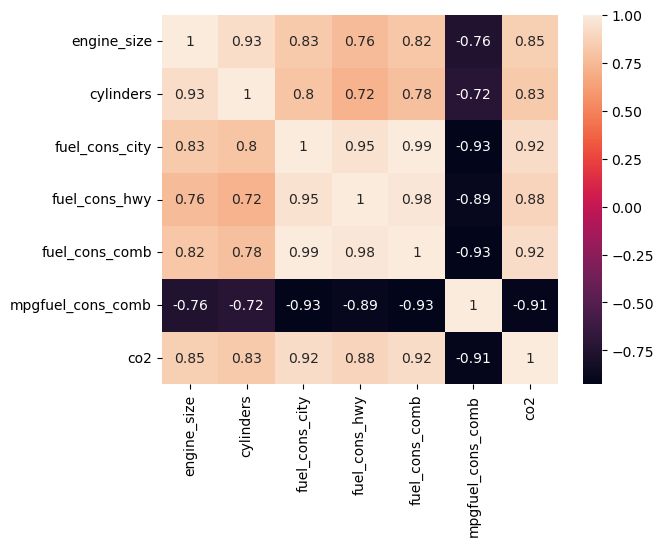

In [15]:
sns.heatmap(df.corr(), annot = True)

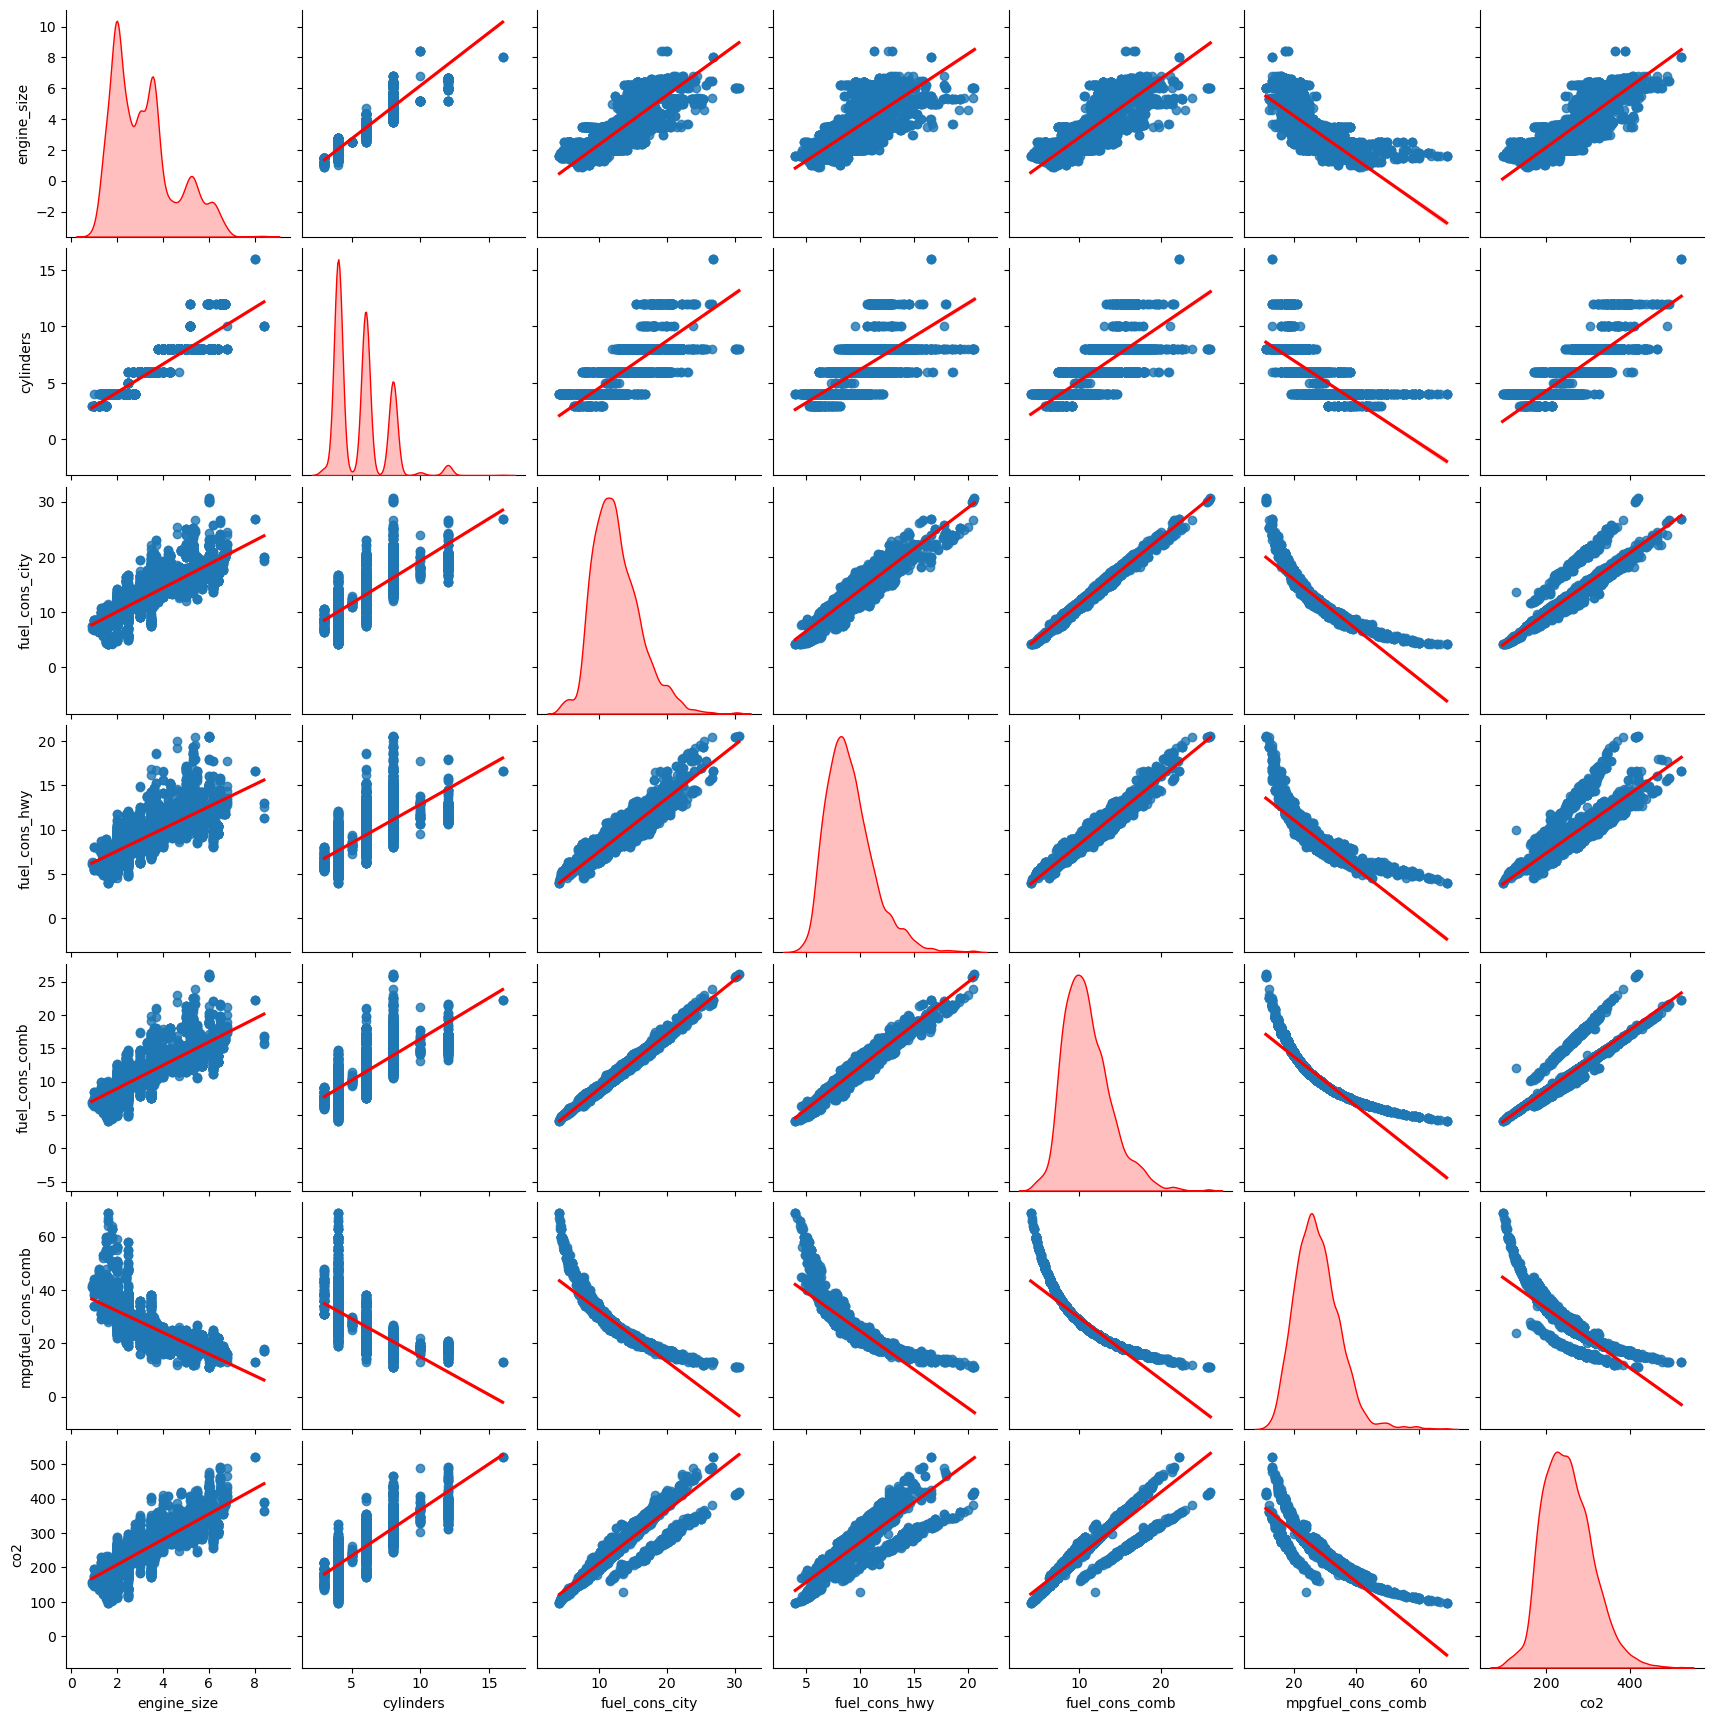

In [16]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});


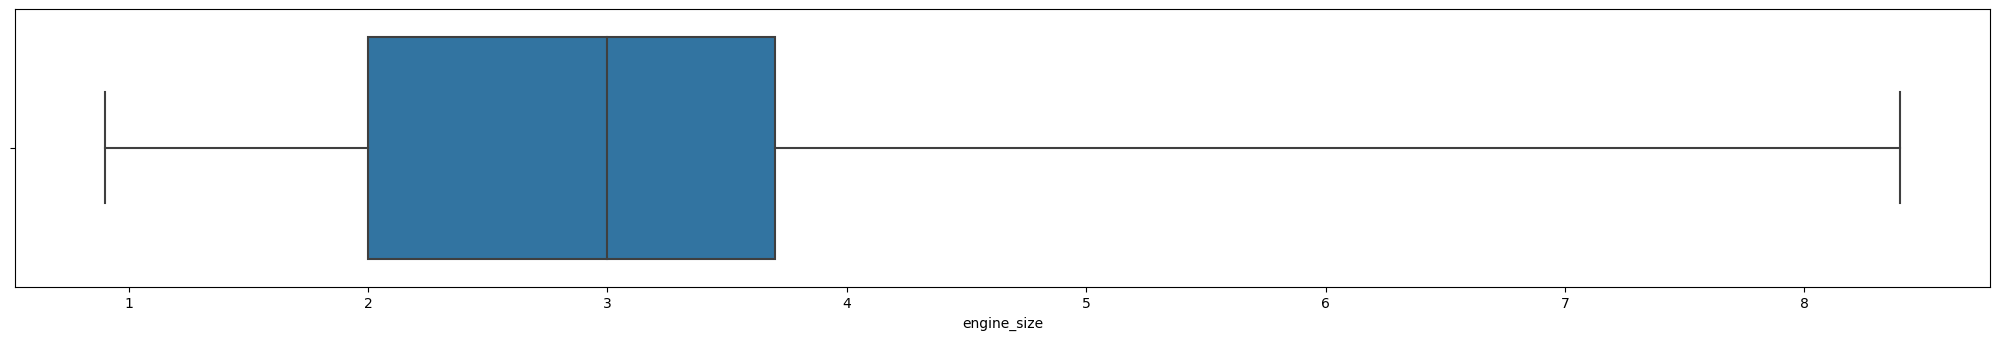

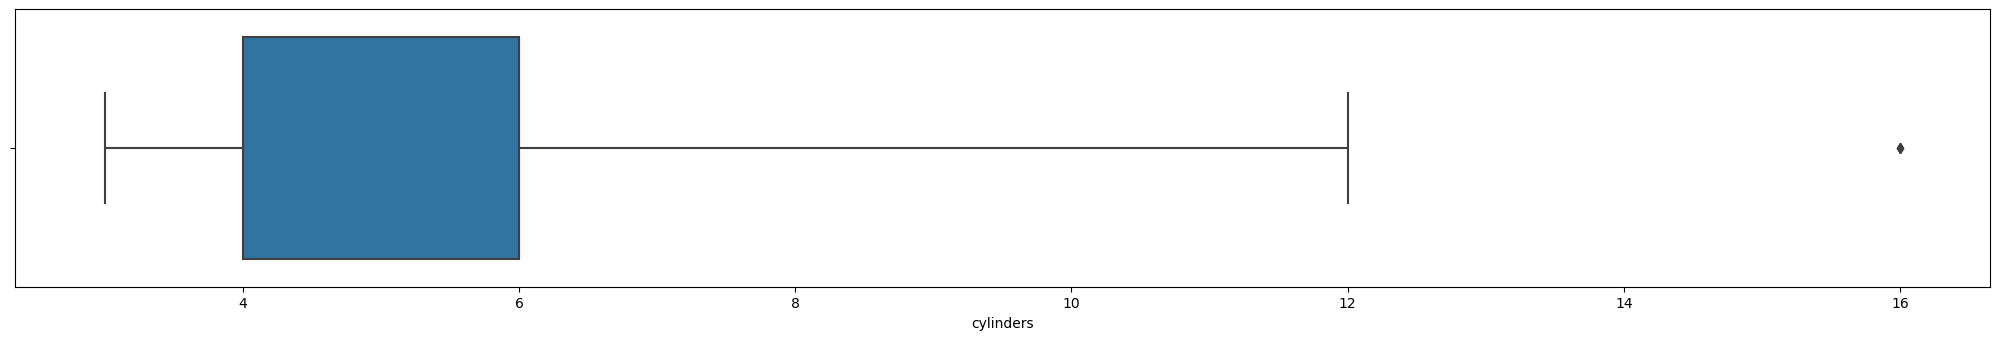

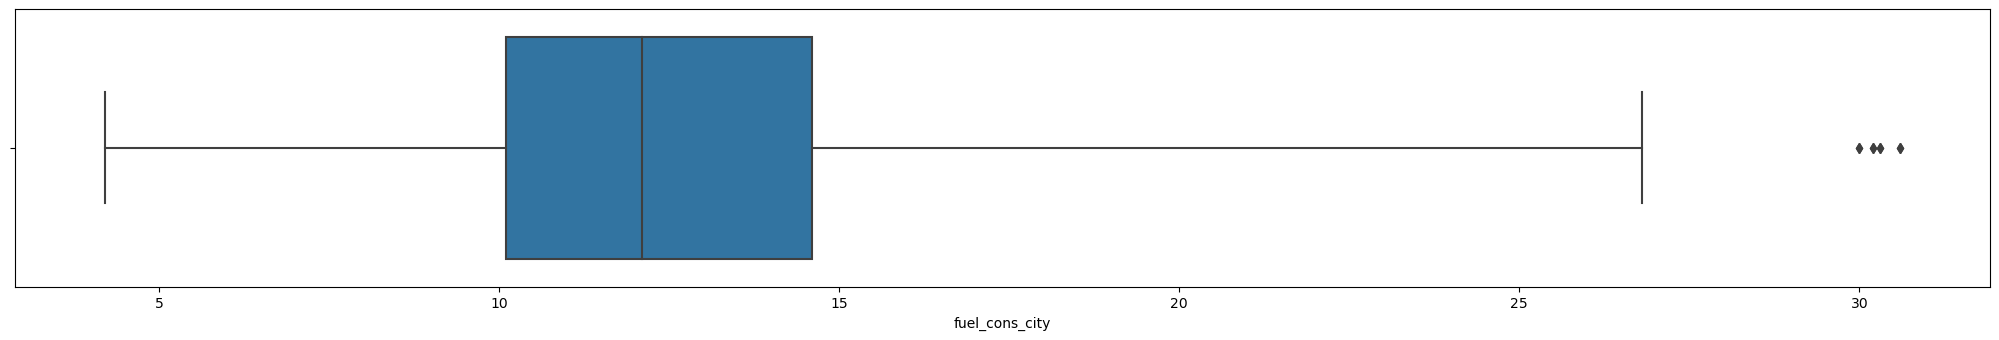

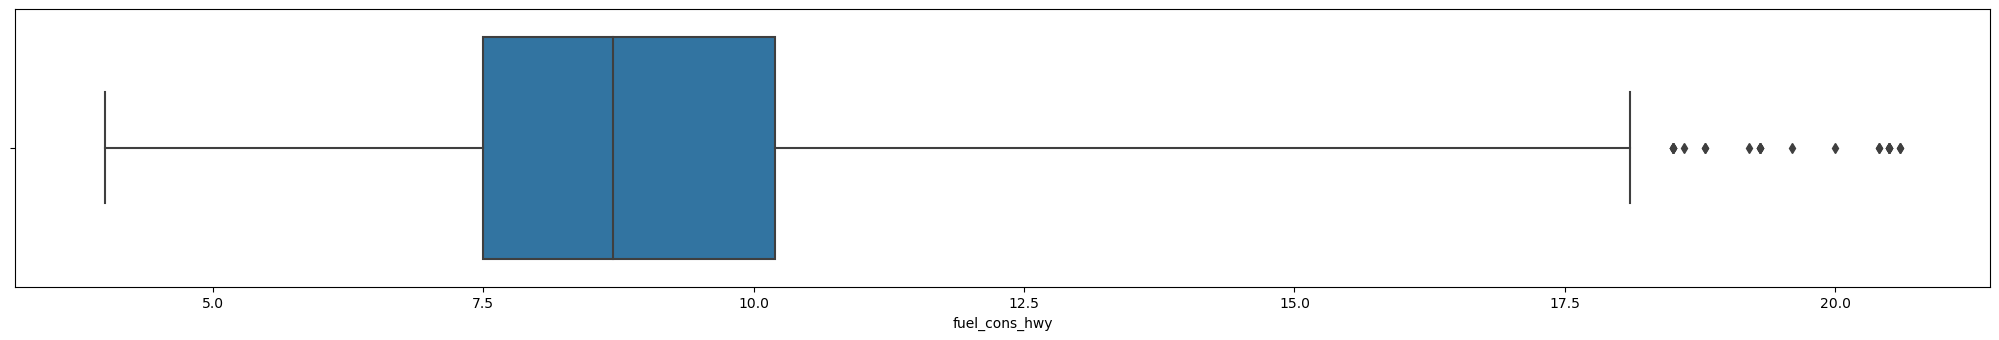

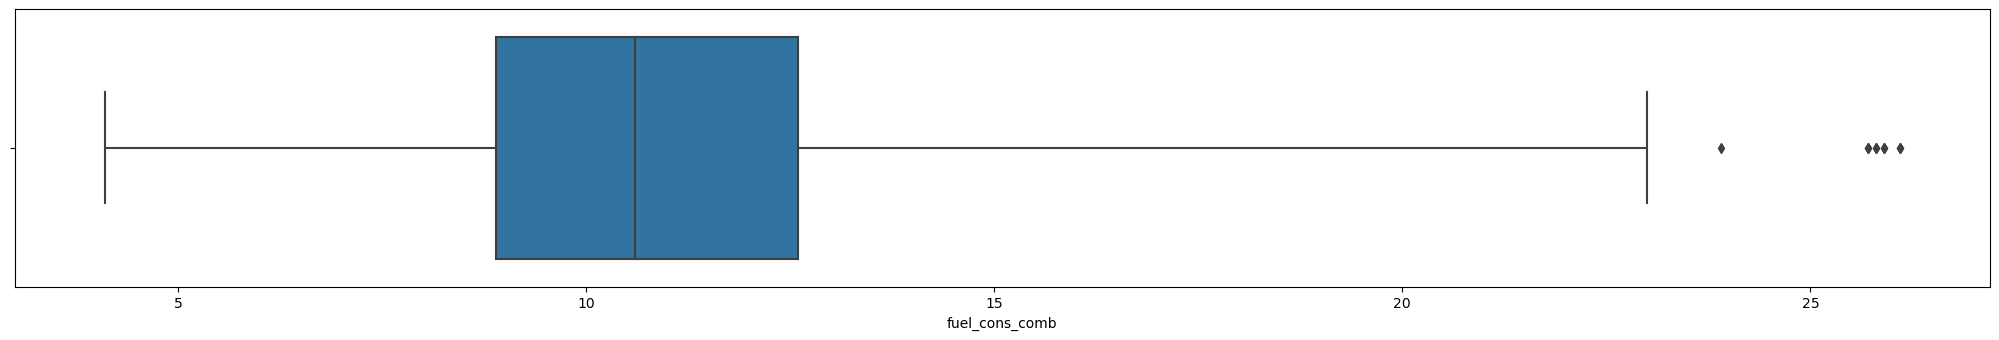

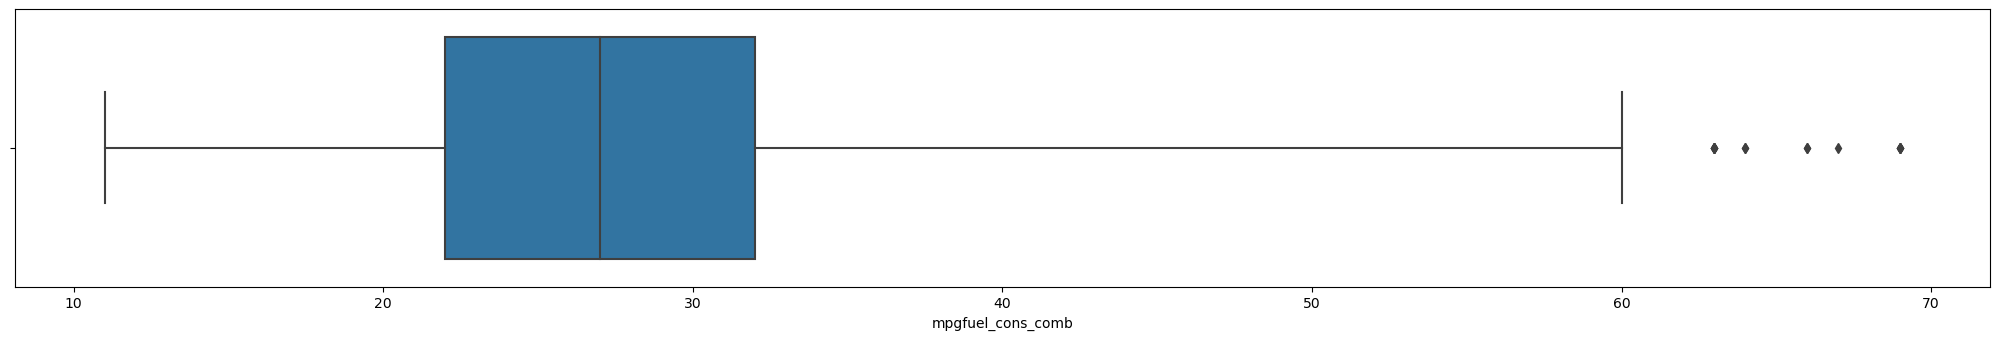

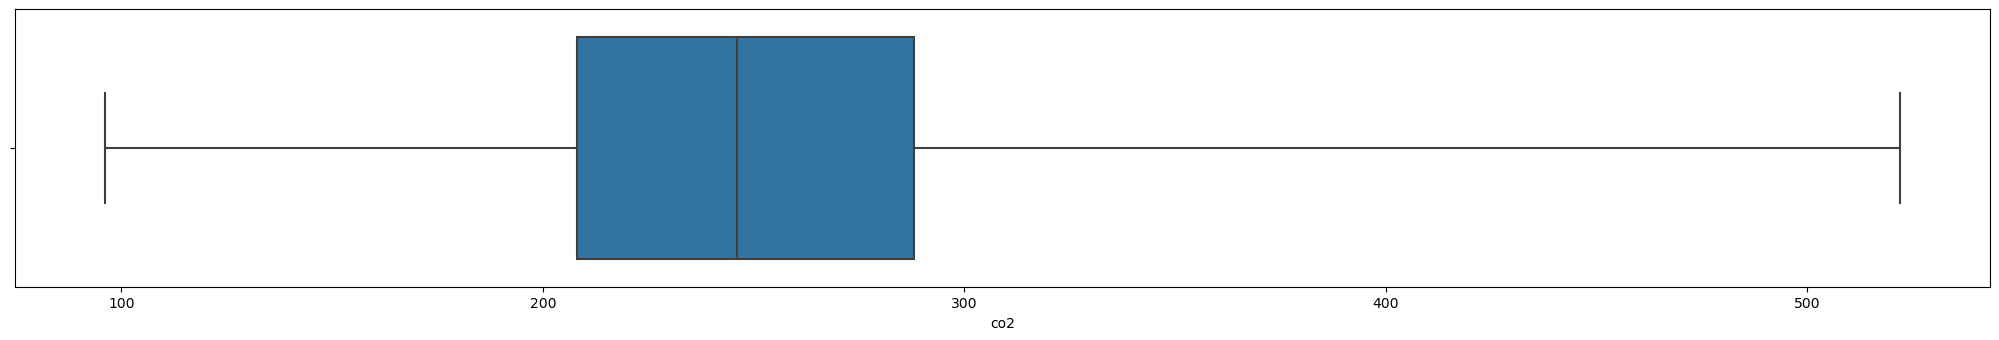

In [17]:
#Outliers Check
index = 0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)), 2, index)
    sns.boxplot(x=feature, data = df, whis = 3)
    plt.tight_layout()
    plt.show()

In [18]:
# data visualization
for column in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    df_column = df[column].value_counts().reset_index().rename(columns={'index':column, column:'Count'})[0:25]
    df_column = df_column.sort_values(by='Count', ascending=False)
    
    fig = go.Figure(go.Bar(x=df_column[column], y=df_column['Count'], 
                    marker = {'color':df_column['Count'], 'colorscale':'Viridis'},
                    text = df_column['Count'], textposition="outside"))
    fig.update_layout(title_text = f'Top 25 {column}', xaxis_title=column, yaxis_title='Number of vehicles', title_x=0.5, width=700, height=500)
    fig.show()
    

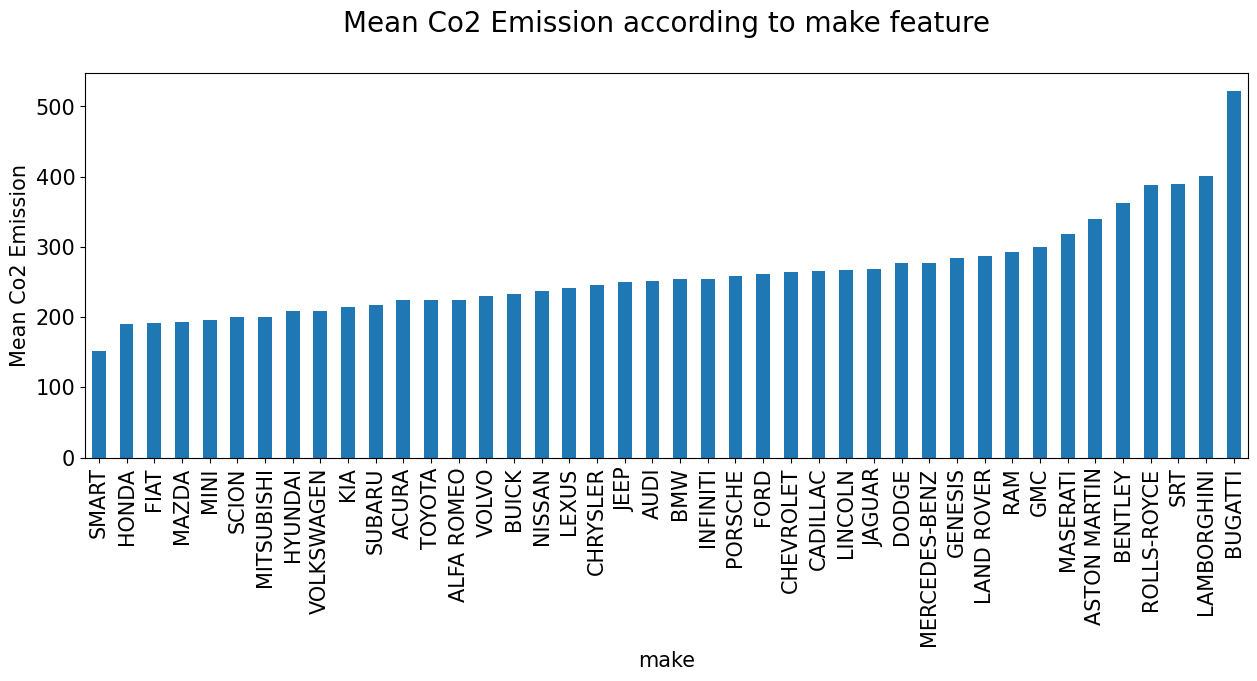

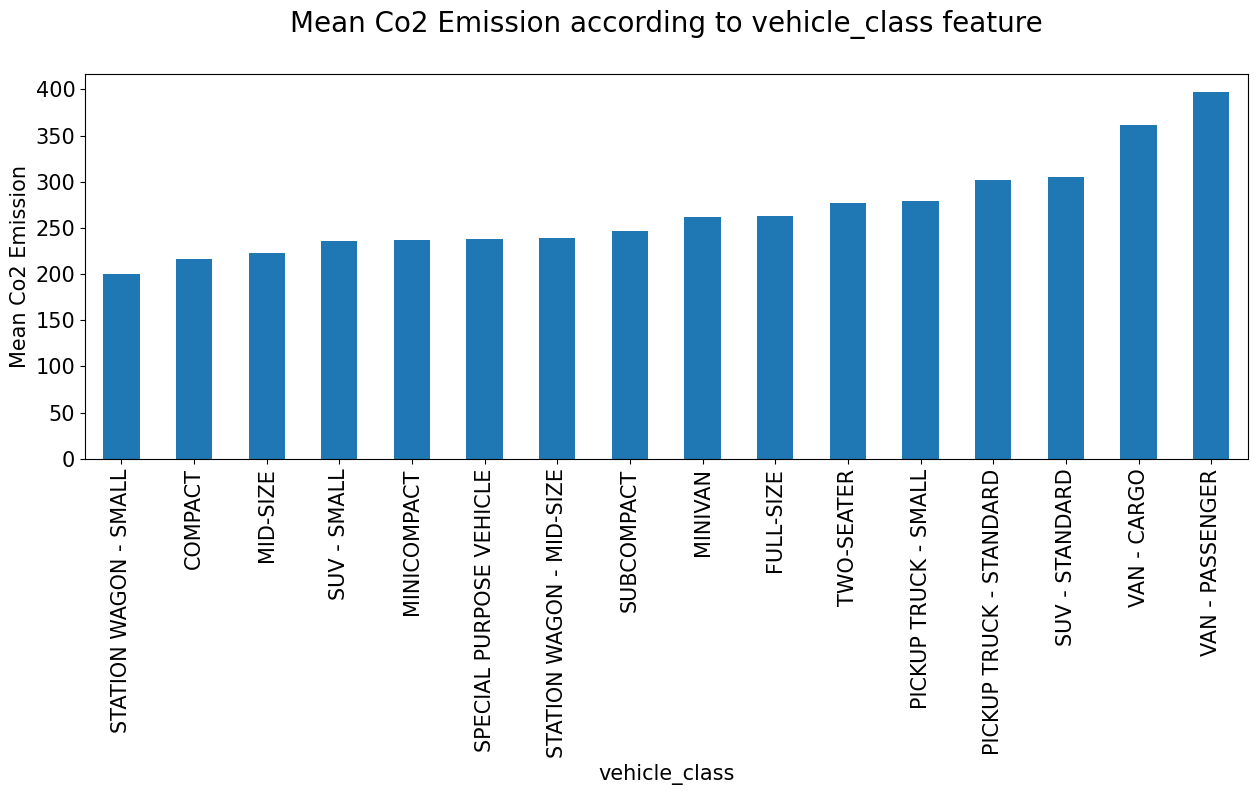

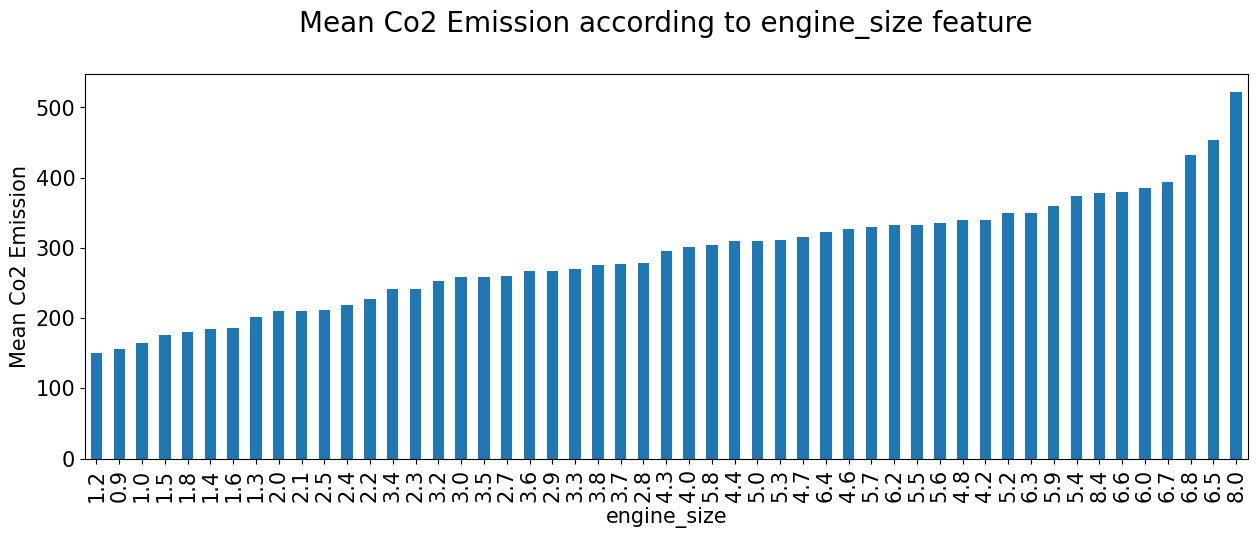

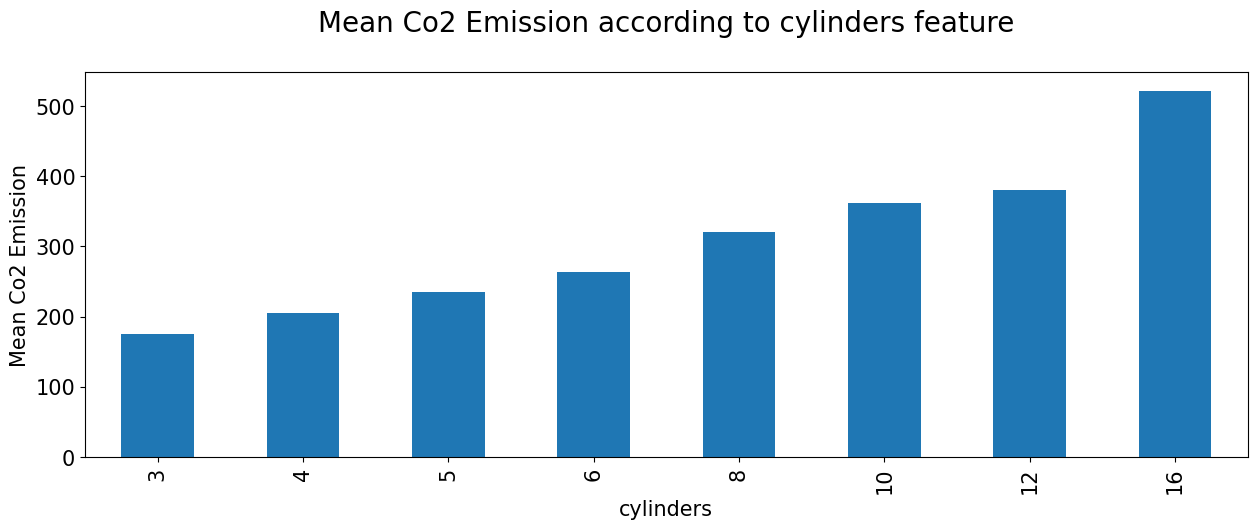

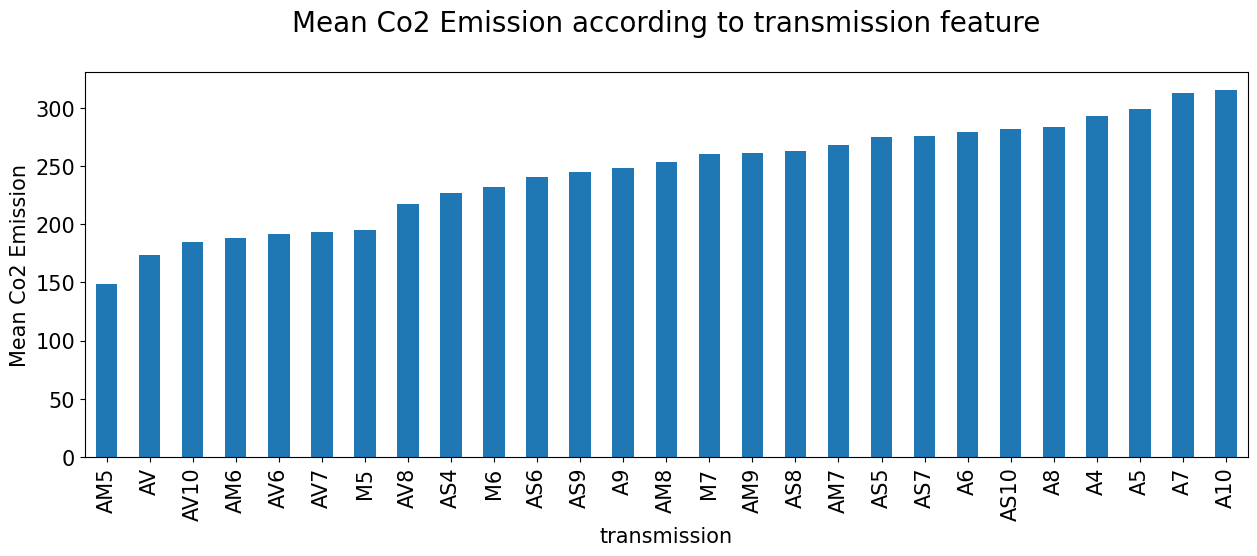

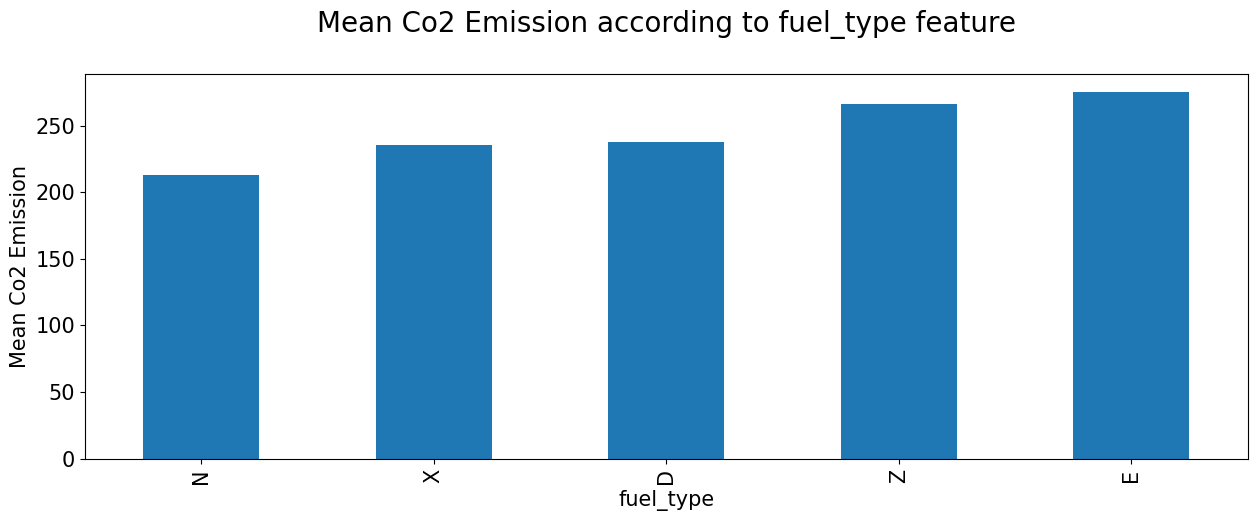

In [19]:
def explore_cat_feature(feature):
    group = df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['co2'].sort_values().plot(kind='bar',fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel("Mean Co2 Emission", fontsize=15);
    plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)

for feature in ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']:
    explore_cat_feature(feature)

<Axes: xlabel='engine_size', ylabel='co2'>

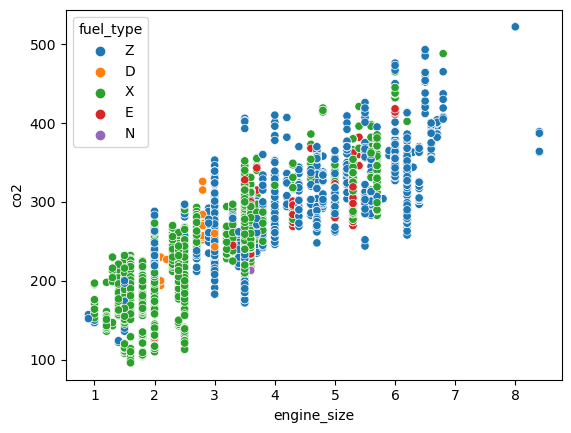

In [20]:
sns.scatterplot(x='engine_size', y='co2', data=df, hue='fuel_type')

In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['fuel_type']= label_encoder.fit_transform(df['fuel_type'])
  
df['fuel_type'].unique()

array([4, 0, 3, 1, 2])

<Axes: xlabel='fuel_type', ylabel='co2'>

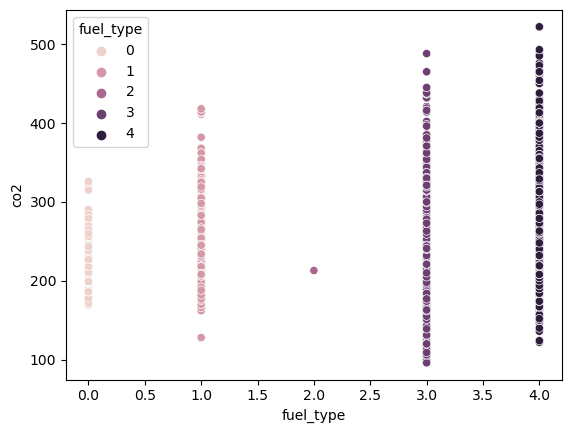

In [22]:
sns.scatterplot(x='fuel_type', y='co2', data=df, hue='fuel_type')


In [23]:
df['fuel_type'].value_counts()

3    3637
4    3202
1     370
0     175
2       1
Name: fuel_type, dtype: int64

In [27]:
# sns.pairplot(df[['']], kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

In [28]:
df.describe()

engine_size    cylinders    fuel_type  fuel_cons_city  fuel_cons_hwy  \
count  7385.000000  7385.000000  7385.000000     7385.000000    7385.000000   
mean      3.160068     5.615030     3.262153       12.556534       9.041706   
std       1.354170     1.828307     0.882482        3.500274       2.224456   
min       0.900000     3.000000     0.000000        4.200000       4.000000   
25%       2.000000     4.000000     3.000000       10.100000       7.500000   
50%       3.000000     6.000000     3.000000       12.100000       8.700000   
75%       3.700000     6.000000     4.000000       14.600000      10.200000   
max       8.400000    16.000000     4.000000       30.600000      20.600000   

       fuel_cons_comb  mpgfuel_cons_comb          co2  
count     7385.000000        7385.000000  7385.000000  
mean        10.975071          27.481652   250.584699  
std          2.892506           7.231879    58.512679  
min          4.100000          11.000000    96.000000  
25%          8.900000          22.000000   208.000000  
50%         10.600000          27.000000   246.000000  
75%         12.600000          32.000000   288.000000  
max         26.100000          69.000000   522.000000

In [29]:
df.corr()

engine_size  cylinders  fuel_type  fuel_cons_city  \
engine_size           1.000000   0.927653   0.058296        0.831379   
cylinders             0.927653   1.000000   0.125175        0.800702   
fuel_type             0.058296   0.125175   1.000000       -0.075605   
fuel_cons_city        0.831379   0.800702  -0.075605        1.000000   
fuel_cons_hwy         0.761526   0.715252  -0.129812        0.948180   
fuel_cons_comb        0.817060   0.780534  -0.095539        0.993810   
mpgfuel_cons_comb    -0.757854  -0.719321  -0.016880       -0.927059   
co2                   0.851145   0.832644   0.100306        0.919592   

                   fuel_cons_hwy  fuel_cons_comb  mpgfuel_cons_comb       co2  
engine_size             0.761526        0.817060          -0.757854  0.851145  
cylinders               0.715252        0.780534          -0.719321  0.832644  
fuel_type              -0.129812       -0.095539          -0.016880  0.100306  
fuel_cons_city          0.948180        0.993810          -0.927059  0.919592  
fuel_cons_hwy           1.000000        0.977299          -0.890638  0.883536  
fuel_cons_comb          0.977299        1.000000          -0.925576  0.918052  
mpgfuel_cons_comb      -0.890638       -0.925576           1.000000 -0.907426  
co2                     0.883536        0.918052          -0.907426  1.000000

In [30]:
df['transmission'].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: transmission, dtype: int64

In [31]:
df['vehicle_class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

Machine Learning

In [32]:
X = df[['engine_size', 'cylinders', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb']]
y = df['co2']

In [33]:
X.shape

(7385, 7)

In [34]:
y.shape

(7385,)

In [35]:
df.columns


Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [37]:
X_train.shape

(5908, 7)

In [38]:
y_train.shape


(5908,)

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(X_train)

StandardScaler()

In [41]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.12149345,  0.20534188,  0.83880821, ..., -0.42937884,
        -0.37681659,  0.21701963],
       [ 0.6141664 ,  0.20534188, -0.30754361, ...,  0.56440556,
         0.59257065, -0.75620352],
       [-0.12149345,  0.20534188,  0.83880821, ..., -0.02283068,
         0.24636092, -0.47813976],
       ...,
       [ 0.24633648,  0.20534188, -0.30754361, ..., -0.11317471,
        -0.20371173, -0.06104413],
       [-0.48932338, -0.88513888, -0.30754361, ..., -0.74558297,
        -0.82688924,  0.77314715],
       [ 0.6141664 ,  1.29582264,  0.83880821, ...,  0.47406152,
         0.31560287, -0.47813976]])

In [42]:
X_train_scaled.shape

(5908, 7)

In [43]:
# scaler.fit(X_test)

In [44]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12149345,  0.20534188,  0.83880821, ..., -0.02283068,
        -0.03060686, -0.200076  ],
       [ 0.90843035,  1.29582264,  0.83880821, ...,  1.1516418 ,
         1.2849901 , -1.17329916],
       [ 2.23261809,  1.29582264,  0.83880821, ...,  1.06129776,
         1.04264329, -1.03426728],
       ...,
       [-1.29854922, -0.88513888, -0.30754361, ..., -1.10695912,
        -1.10385702,  1.19024279],
       [ 0.24633648,  0.20534188,  0.83880821, ..., -0.38420683,
        -0.27295367,  0.07798775],
       [-0.85715331, -0.88513888,  0.83880821, ..., -1.10695912,
        -0.96537313,  0.91217903]])

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model_LR = LinearRegression()

In [47]:
model_LR.fit(X_train, y_train)

LinearRegression()

In [48]:
model_LR.score(X_train, y_train)

0.9140797404662868

In [49]:
model_LR.score(X_test, y_test)

0.9098617512478502

In [50]:
from sklearn.svm import SVR
model_SVR = SVR(kernel = 'rbf')
model_SVR.fit(X_train, y_train)

SVR()

In [51]:
model_SVR.score(X_train, y_train)

0.8910504066671199

In [52]:
model_SVR.score(X_test, y_test)

0.8899654269090288

In [53]:
from sklearn.ensemble import RandomForestRegressor


In [54]:
model_RF = RandomForestRegressor(n_estimators=100, random_state=0)

In [55]:
model_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [56]:
model_RF.score(X_train, y_train)

0.9993628280729883

In [57]:
model_RF.score(X_test, y_test)

0.997714401630326

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
model_DTR = DecisionTreeRegressor(max_depth=5, max_features='sqrt')

In [60]:
model_DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='sqrt')

In [61]:
model_DTR.score(X_train, y_train)

0.9534860860607546

In [62]:
model_DTR.score(X_test, y_test)

0.9483824296309958

In [63]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
model_AdaBR = AdaBoostRegressor(random_state = 0, n_estimators=100)

In [66]:
model_AdaBR.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [67]:
model_AdaBR.score(X_test, y_test)

0.919363915595837

In [68]:
model_AdaBR.score(X_train, y_train)

0.9227259803303535